# Part 1 !! Pandas DataFrame to PostgreSQL using Python

<h3>Introduction and Connection & Database Creation</h3>

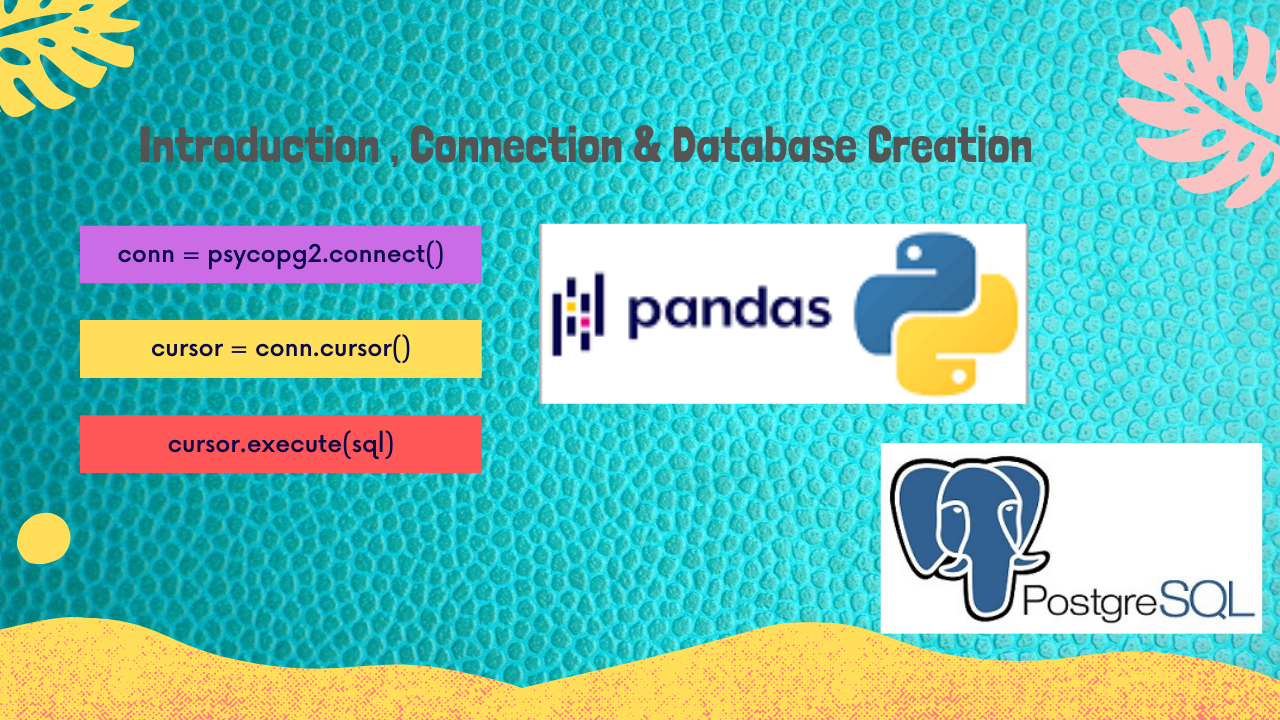

<h4>(a) Python 3.8.3 </h4>

[Anaconda download link](https://www.anaconda.com/products/individual)

<h4>(b) PostgreSQL 13</h4>

[Download link](https://www.postgresql.org/download/)

<b>(c) Psycopg2 : </b> To install <b>Psycopg2</b> use the command: <b>pip install psycopg2</b>

<h2>1. Introduction</h2>

PostgreSQL is a powerful, open source object-relational database system that uses and extends the SQL language combined with many features that safely store and scale the most complicated data workloads. The origins of PostgreSQL date back to 1986 as part of the POSTGRES project at the University of California at Berkeley and has more than 30 years of active development on the core platform.

<h3>2. Connect to the PostgreSQL & Create a Database</h3>

<h3>Step 1: Import the libraries </h3>

In [44]:
# import sys to get more detailed Python exception info
import sys

# import the connect library for psycopg2
import psycopg2

# import the error handling libraries for psycopg2
from psycopg2 import OperationalError, errorcodes, errors

<h3>Step 2: Specify the connection parameters</h3>

In [45]:
# Note: please change your database, username & password as per your own values

conn_params_dic = {
    "host"      : "localhost",
    "user"      : "postgres",
    "password"  : "Passw0rd"
}

<h3> Step 3 : Define a function that handles and parses psycopg2 exceptions </h3>

In [46]:
def show_psycopg2_exception(err):
    # get details about the exception
    err_type, err_obj, traceback = sys.exc_info()

    # get the line number when exception occured
    line_n = traceback.tb_lineno

    # print the connect() error
    print ("\npsycopg2 ERROR:", err, "on line number:", line_n)
    print ("psycopg2 traceback:", traceback, "-- type:", err_type)

    # psycopg2 extensions.Diagnostics object attribute
    print ("\nextensions.Diagnostics:", err.diag)

    # print the pgcode and pgerror exceptions
    print ("pgerror:", err.pgerror)
    print ("pgcode:", err.pgcode, "\n")

<h3> Step 4 : Define a connect function to connect to the PostgreSQL database server</h3>

In [47]:
def connect(conn_params_dic):
    conn = None
    try:
        print('Connecting to the PostgreSQL...........')
        conn = psycopg2.connect(**conn_params_dic)
        print("Connection successful..................")
        
    except OperationalError as err:
        # pass exception to function
        show_psycopg2_exception(err)

        # set the connection to 'None' in case of error
        conn = None
    
    return conn

<h3> Step 5 : Creates a database named irisdb in PostgreSQL database </h3>

In [48]:
conn = connect(conn_params_dic)
conn.autocommit = True

if conn!=None:
    
    try:
        cursor = conn.cursor();
        # Dropping database irisdb if exists
        cursor.execute("DROP DATABASE IF EXISTS irisdb;")
    
        # Creating a database
        cursor.execute("CREATE DATABASE irisdb;");
        print("irisdb database is created successfully..................")
    
        # Closing the cursor & connection
        cursor.close()
        conn.close()
        
    except OperationalError as err:
        # pass exception to function
        show_psycopg2_exception(err)
        # set the connection to 'None' in case of error
        conn = None

Connecting to the PostgreSQL...........
Connection successful..................
irisdb database is created successful..................


<b>Conclusion : </b> This ends our Part 1 on Introduction , Connection & Database Creation. In this tutorial we have learned how to connect and create database in PostgreSQL database using python.

<h4> Next : Part 2 - Create Table in PostgreSQL Database using Python</h4>

<b>Stay Positive !! Stay Safe !! Keep Learning :):)